In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Loading the company stock data

In [2]:
df = pd.read_csv("TCS_stock_history.csv")

### Extract the "Close" prices and convert it to a numpy array

In [3]:
data = df.filter(["Close"])

In [4]:
dataset = data.values

In [5]:
training_data_len = int(np.ceil(0.8 * len(dataset)))

### Scale the extracted data and split it to training and test data

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [7]:
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

# Define the LSTM (Long-Short-Term-Memory) model

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model and create dataset for testing data

In [10]:
model.fit(train_data, train_data, batch_size=1, epochs=10)

Epoch 1/10
3571/3571 [==============================] - 8s 2ms/step - loss: 3.0107e-04
Epoch 2/10
3571/3571 [==============================] - 6s 2ms/step - loss: 7.6999e-06
Epoch 3/10
3571/3571 [==============================] - 6s 2ms/step - loss: 1.3804e-05
Epoch 4/10
3571/3571 [==============================] - 6s 2ms/step - loss: 1.4485e-05
Epoch 5/10
3571/3571 [==============================] - 6s 2ms/step - loss: 5.6162e-06
Epoch 6/10
3571/3571 [==============================] - 6s 2ms/step - loss: 9.6631e-06
Epoch 7/10
3571/3571 [==============================] - 7s 2ms/step - loss: 1.4679e-05
Epoch 8/10
3571/3571 [==============================] - 5s 2ms/step - loss: 5.8835e-06
Epoch 9/10
3571/3571 [==============================] - 6s 2ms/step - loss: 1.0913e-05
Epoch 10/10
3571/3571 [==============================] - 6s 2ms/step - loss: 6.0465e-06


In [11]:
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(training_data_len, len(dataset)):
    x_test.append(scaled_data[i - train_data.shape[1]:i, 0])

### Convert the testing dataset into a numpy array

In [12]:
x_test = np.array(x_test)

In [13]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Get the predicted values

In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 1s 1ms/step


### Get the RMSE (Root Mean Square Error) value

In [15]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [16]:
print("RMSE:", rmse)

RMSE: 82.72583213073676


###### *RMSE measures the average difference between the predicted values generated by a model and the actual observed values

# Visualization of the predicted values and actual values

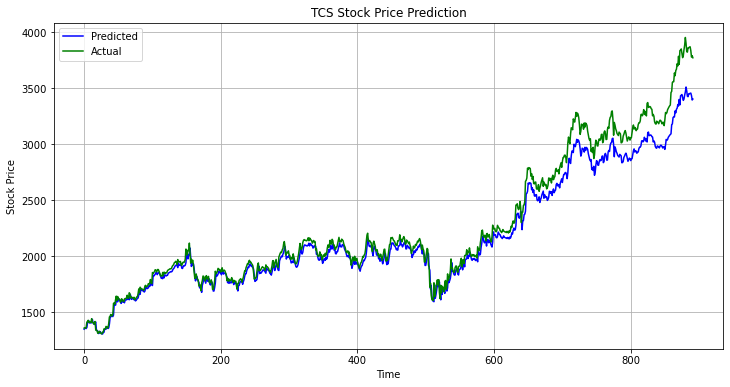

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, color='blue', label='Predicted')
plt.plot(y_test, color='green', label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('TCS Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Save the visualized data as a CSV file

In [18]:
predictions_df = pd.DataFrame(predictions, columns=["Predicted Price"])
actual_prices_df = pd.DataFrame(y_test, columns=["Actual Price"])

In [19]:
result_df = pd.concat([predictions_df, actual_prices_df], axis=1)
print(result_df)
result_df.to_csv("predicted_actual_prices.csv", index=False)

     Predicted Price  Actual Price
0        1351.057983   1360.457153
1        1357.445679   1363.805054
2        1360.718018   1359.411255
3        1356.423218   1369.245483
4        1366.034424   1414.604004
..               ...           ...
887      3456.482910   3871.300049
888      3457.837402   3836.949951
889      3435.059814   3779.149902
890      3396.332764   3791.899902
891      3404.918945   3773.199951

[892 rows x 2 columns]
